In [285]:
import pandas as pd


In [286]:
#Custom Method used
def session(col):
    return col[0]


In [287]:
root='data/Attendence of Members - Sessions 21 - 43.xls'

df_1= pd.read_excel(root, sheet_name= 'Session 1 to 20')
df_2= pd.read_excel(root,sheet_name= 'Attendence of Members - Session')

df_1.columns= ['meta', 'constituency','name','presense']
df_2.columns= ['meta', 'constituency','name','presense']


In [288]:
df_1.columns

Index(['meta', 'constituency', 'name', 'presense'], dtype='object')

In [289]:
df_2.columns

Index(['meta', 'constituency', 'name', 'presense'], dtype='object')

In [290]:
df_1.shape

(37247, 4)

In [291]:
df_2.shape

(38992, 4)

In [292]:
df = df_1.append(df_2)
df.shape

(76239, 4)

In [293]:
df.reset_index(inplace=True,drop=True)
df.head()

,meta,constituency,name,presense
0,NaN,(Notice Office),NaN,NaN
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN
3,Sl. No.,Constituency,Name of Member,Status
4,1,NA-1,Moulana Abdul Akbar Chitrali,P


In [294]:
cols=df.columns
cols

Index(['meta', 'constituency', 'name', 'presense'], dtype='object')

In [295]:
def print_header(string, delimeter = '*', times_count = 10):
    print(delimeter * times_count, string, delimeter * times_count)


print_header('info', times_count=15)
print(df.info())

print_header('is NaN', times_count=15)
print(df.isna().sum())

*************** info ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76239 entries, 0 to 76238
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   meta          75618 non-null  object
 1   constituency  74888 non-null  object
 2   name          75844 non-null  object
 3   presense      74560 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB
None
*************** is NaN ***************
meta             621
constituency    1351
name             395
presense        1679
dtype: int64


In [296]:
# sample data
df.iloc[37040: 37350]


,meta,constituency,name,presense
37040,255,Reserved Seat,Mr. Ramesh Kumar Vankwani,P
37041,256,Reserved Seat,Mr. Jamshed Thomas,P
37042,257,Reserved Seat,Dr. Darshan,P
37043,258,Reserved Seat,Mr. Kesoo Mal Kheeal Das,P
37044,259,Reserved Seat,Mr. Naveed Aamir Jeeva,P
...,...,...,...,...
37345,95,NA-148,Chaudhry Muhammad Ashraf,P
37346,96,NA-150,Syed Fakhar Imam,P
37347,97,NA-151,Mr. Muhammad Khan Daha,P
37348,98,NA-153,Chaudhry Iftikhar Nazir,P


In [297]:
# is there any absent count present in the column?
df.loc[(df['presense'] == 'A') | (df['presense'] == 'a')]


,meta,constituency,name,presense
57019,32,NA-43,Mr. Noor-ul-Haq Qadri,A
72108,136,NA-192,Sardar Muhammad Khan Laghari,A


it seems there are only 2 absense present in the column, which makes it most unlikely that there were only 2 absense in the whole assembly attendance records.

It is more likely that only present members in the sitting were taken in each sitting.

TODO:: Check if the appearance of each name is equal to the number of total sittings in each session?

# **Data Cleaning**

In [298]:
cols


Index(['meta', 'constituency', 'name', 'presense'], dtype='object')

In [299]:
df['meta']

0                                                      NaN
1        1st Joint Session held on Monday, the 17th Sep...
2        The following Mambers National Assembly of Pak...
3                                                  Sl. No.
4                                                        1
                               ...                        
76234                                                  155
76235                                                  156
76236                                                  157
76237                                                  158
76238                                                  159
Name: meta, Length: 76239, dtype: object

In [300]:
df[df['meta'].str.contains('(\d)[a-z]+ Session|session', na=False, regex=True)]

C:\Users\HP\AppData\Local\Temp/ipykernel_12388/2723958011.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['meta'].str.contains('(\d)[a-z]+ Session|session', na=False, regex=True)]


,meta,constituency,name,presense
633,1st Session,NaN,"2nd Sitting held on Wednesday, the 15th August...",NaN
968,1st Session,NaN,"3rd Sitting held on Friday, the 17th August, 2018",NaN
1845,2nd Session,NaN,"7th Sitting held on Monday, the 1st October, 2018",NaN
2087,2nd Session,NaN,"8th Sitting held on Tuesday, the 2nd October, ...",NaN
2374,2nd Session,NaN,"9th Sitting held on Wednesday, the 3rd October...",NaN
...,...,...,...,...
75626,43rd Session,NaN,"12th Sitting held on Wednesday, the 22nd June ...",NaN
75741,43rd Session,NaN,"13th Sitting held on Thursday, the 23rd June ,...",NaN
75848,43rd Session,NaN,"14th Sitting held on Friday, the 24th June , 2022",NaN
75926,43rd Session,NaN,"15th Sitting held on Monday, the 27th June , 2022",NaN


In [301]:
df[df['meta'].str.contains('(\d)[a-z]+ Session|session', na=False, regex=True)]['meta'].str.findall('(\d+)').apply(session)

C:\Users\HP\AppData\Local\Temp/ipykernel_12388/2004769873.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['meta'].str.contains('(\d)[a-z]+ Session|session', na=False, regex=True)]['meta'].str.findall('(\d+)').apply(session)


633       1
968       1
1845      2
2087      2
2374      2
         ..
75626    43
75741    43
75848    43
75926    43
76077    43
Name: meta, Length: 264, dtype: object

In [302]:
df.head()

,meta,constituency,name,presense
0,NaN,(Notice Office),NaN,NaN
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN
3,Sl. No.,Constituency,Name of Member,Status
4,1,NA-1,Moulana Abdul Akbar Chitrali,P


In [303]:
df['session']= df[df['meta'].str.contains('(\d)[a-z]+ Session|session', na=False, regex=True)]['meta'].str.findall('(\d+)').apply(session).astype(float)

df['joint_session'] = df[df['meta'].str.contains('(\d)[a-zA-Z]+ joint|Joint', regex=True, na=False)]['meta'].str.findall('(\d+)').apply(session).astype(float)


C:\Users\HP\AppData\Local\Temp/ipykernel_12388/3716610267.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['session']= df[df['meta'].str.contains('(\d)[a-z]+ Session|session', na=False, regex=True)]['meta'].str.findall('(\d+)').apply(session).astype(float)
C:\Users\HP\AppData\Local\Temp/ipykernel_12388/3716610267.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['joint_session'] = df[df['meta'].str.contains('(\d)[a-zA-Z]+ joint|Joint', regex=True, na=False)]['meta'].str.findall('(\d+)').apply(session).astype(float)


In [304]:
df[df['meta'].str.contains('(\d+)[a-zA-Z]+ joint', regex=True, na=False, case=False)]['meta'].str.findall('(\d+)').apply(session).astype(float)

C:\Users\HP\AppData\Local\Temp/ipykernel_12388/1877543122.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['meta'].str.contains('(\d+)[a-zA-Z]+ joint', regex=True, na=False, case=False)]['meta'].str.findall('(\d+)').apply(session).astype(float)


1         1.0
1301      2.0
1540      2.0
4215      3.0
4463      3.0
4970      4.0
7807      5.0
8324      6.0
10569     7.0
13365     8.0
15695     9.0
19441    10.0
20617    11.0
20788    11.0
Name: meta, dtype: float64

In [305]:
df.head()


,meta,constituency,name,presense,session,joint_session
0,NaN,(Notice Office),NaN,NaN,NaN,NaN
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,NaN
3,Sl. No.,Constituency,Name of Member,Status,NaN,NaN
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,NaN


In [306]:
df.loc[df.joint_session.astype(float) >= 1, :]


,meta,constituency,name,presense,session,joint_session
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
1301,2nd Joint\nSession,NaN,"2nd Sitting held on Friday, the 1st March, 2019",NaN,NaN,2.0
1540,2nd Joint\nSession,NaN,"1st Sitting held on Thursday, the 28th Februar...",NaN,NaN,2.0
4215,3rd Joint Session,NaN,"1st Sitting held on Tuesday, the 6th August, 2019",NaN,NaN,3.0
4463,3rd Joint Session,NaN,"2nd Sitting held on Wednesday, the 7th August,...",NaN,NaN,3.0
4970,4th Joint Session,NaN,"1st Sitting held on Thursday, the 12th Septemb...",NaN,NaN,4.0
7807,5th Joint Session,NaN,"1st Sitting held on Friday, the 14th February,...",NaN,NaN,5.0
8324,6th Joint Session,NaN,"1st Sitting held on Thursday, the 6th August, ...",NaN,NaN,6.0
10569,7th Joint Session,NaN,"1st Sitting held on Thursday, the 20th August,...",NaN,NaN,7.0
13365,8th Joint Session,NaN,"1st Sitting held on Wednesday, the 16th Septem...",NaN,NaN,8.0


In [307]:
df.iloc[1295:1350]

,meta,constituency,name,presense,session,joint_session
1295,325,Reserved Seat,Mr. Kesoo Mal Kheeal Das,P,NaN,NaN
1296,326,Reserved Seat,Mr. Ramesh Lal,P,NaN,NaN
1297,327,Reserved Seat,Mr. Naveed Aamir,P,NaN,NaN
1298,328,Reserved Seat,Mr. James Iqbal,P,NaN,NaN
1299,NATIONAL ASSEMBLY SECRETARIAT,NaN,NaN,NaN,NaN,NaN
1300,(Notice Office),NaN,NaN,NaN,NaN,NaN
1301,2nd Joint\nSession,NaN,"2nd Sitting held on Friday, the 1st March, 2019",NaN,NaN,2.0
1302,The following Members National Assembly of Pak...,NaN,NaN,NaN,NaN,NaN
1303,S. No,Constituency,Name,Status,NaN,NaN
1304,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,NaN


In [308]:
df.to_csv('data/modified/modified_data.csv', index=False)

In [309]:
from numpy import nan
from pandas import isna, notna



## Manipulating Data

In [310]:
# data = pd.read_csv('data/modified/test.csv')
data = df.copy()
data.head()

,meta,constituency,name,presense,session,joint_session
0,NaN,(Notice Office),NaN,NaN,NaN,NaN
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,NaN
3,Sl. No.,Constituency,Name of Member,Status,NaN,NaN
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,NaN


In [311]:
session_vals = data.loc[data['session'].astype(float) >= 1]
session_index = session_vals.index

In [312]:
session_index


Int64Index([  633,   968,  1845,  2087,  2374,  2674,  2960,  3214,  3476,
             3726,
            ...
            75060, 75175, 75299, 75405, 75512, 75626, 75741, 75848, 75926,
            76077],
           dtype='int64', length=264)

In [313]:
len(session_index)

264

In [314]:
number_of_sessions = session_vals['session'].value_counts().sum()
number_of_sessions


264

In [315]:
session_vals['session'].unique()


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 28., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43.])

In [316]:
data.iloc[session_index]


,meta,constituency,name,presense,session,joint_session
633,1st Session,NaN,"2nd Sitting held on Wednesday, the 15th August...",NaN,1.0,NaN
968,1st Session,NaN,"3rd Sitting held on Friday, the 17th August, 2018",NaN,1.0,NaN
1845,2nd Session,NaN,"7th Sitting held on Monday, the 1st October, 2018",NaN,2.0,NaN
2087,2nd Session,NaN,"8th Sitting held on Tuesday, the 2nd October, ...",NaN,2.0,NaN
2374,2nd Session,NaN,"9th Sitting held on Wednesday, the 3rd October...",NaN,2.0,NaN
...,...,...,...,...,...,...
75626,43rd Session,NaN,"12th Sitting held on Wednesday, the 22nd June ...",NaN,43.0,NaN
75741,43rd Session,NaN,"13th Sitting held on Thursday, the 23rd June ,...",NaN,43.0,NaN
75848,43rd Session,NaN,"14th Sitting held on Friday, the 24th June , 2022",NaN,43.0,NaN
75926,43rd Session,NaN,"15th Sitting held on Monday, the 27th June , 2022",NaN,43.0,NaN


In [317]:
for x in range(len(session_index) - 1):
    print(session_index[x], session_index[x+1])

633 968
968 1845
1845 2087
2087 2374
2374 2674
2674 2960
2960 3214
3214 3476
3476 3726
3726 3986
3986 4711
4711 5246
5246 5503
5503 5675
5675 5926
5926 6171
6171 6441
6441 6720
6720 6972
6972 7262
7262 7535
7535 8089
8089 8628
8628 8887
8887 9151
9151 9417
9417 9655
9655 9835
9835 10079
10079 10337
10337 10825
10825 11099
11099 11369
11369 11642
11642 11861
11861 12051
12051 12305
12305 12576
12576 12874
12874 13136
13136 13687
13687 13926
13926 14202
14202 14483
14483 14760
14760 14982
14982 15217
15217 15427
15427 15981
15981 16226
16226 16440
16440 16640
16640 16906
16906 17200
17200 17444
17444 17746
17746 18006
18006 18270
18270 18529
18529 18751
18751 18948
18948 19202
19202 19778
19778 19988
19988 20192
20192 20412
20412 20952
20952 21204
21204 21506
21506 21772
21772 22048
22048 22343
22343 22620
22620 22895
22895 23167
23167 23368
23368 23533
23533 23820
23820 24126
24126 24457
24457 24792
24792 25130
25130 25453
25453 25665
25665 25905
25905 26065
26065 26241
26241 26464
2646

In [318]:
data_original = data.copy()

In [319]:
from pandas import isna, notna, notnull
from numpy import nan

for x in range(len(session_index) - 1):
    lower = session_index[x]
    upper = session_index[x+1]
    current_number = data.iloc[lower]['session']
    next_number = data.iloc[upper]['session']

    data.iloc[lower : upper, 4] = current_number
    # if notna(current_number):
    #     print(current_number, 'next: ', next_number)
    # print(session_index[x], session_index[x+1])


In [320]:
data.iloc[633:635]


,meta,constituency,name,presense,session,joint_session
633,1st Session,NaN,"2nd Sitting held on Wednesday, the 15th August...",NaN,1.0,NaN
634,The following Members National Assembly of Pak...,NaN,NaN,NaN,1.0,NaN


In [321]:
session_vals


,meta,constituency,name,presense,session,joint_session
633,1st Session,NaN,"2nd Sitting held on Wednesday, the 15th August...",NaN,1.0,NaN
968,1st Session,NaN,"3rd Sitting held on Friday, the 17th August, 2018",NaN,1.0,NaN
1845,2nd Session,NaN,"7th Sitting held on Monday, the 1st October, 2018",NaN,2.0,NaN
2087,2nd Session,NaN,"8th Sitting held on Tuesday, the 2nd October, ...",NaN,2.0,NaN
2374,2nd Session,NaN,"9th Sitting held on Wednesday, the 3rd October...",NaN,2.0,NaN
...,...,...,...,...,...,...
75626,43rd Session,NaN,"12th Sitting held on Wednesday, the 22nd June ...",NaN,43.0,NaN
75741,43rd Session,NaN,"13th Sitting held on Thursday, the 23rd June ,...",NaN,43.0,NaN
75848,43rd Session,NaN,"14th Sitting held on Friday, the 24th June , 2022",NaN,43.0,NaN
75926,43rd Session,NaN,"15th Sitting held on Monday, the 27th June , 2022",NaN,43.0,NaN


In [322]:
# joint_session_values
joint_session_vals = data.loc[data['joint_session'].astype(float) >= 1]
joint_session_index = joint_session_vals.index
joint_session_index


Int64Index([    1,  1301,  1540,  4215,  4463,  4970,  7807,  8324, 10569,
            13365, 15695, 19441, 20617, 20788],
           dtype='int64')

In [323]:
for y in range(len(joint_session_index) - 1):
    lower = joint_session_index[y]
    upper = joint_session_index[y+1]
    current_number = data.iloc[lower]['joint_session']
    next_number = data.iloc[upper]['joint_session']

    data.iloc[lower : upper, 5] = current_number

In [324]:
data.iloc[joint_session_index[0]:joint_session_index[1]]



,meta,constituency,name,presense,session,joint_session
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,1.0
3,Sl. No.,Constituency,Name of Member,Status,NaN,1.0
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,1.0
5,2,NA-2,Dr. Haider Ali Khan,P,NaN,1.0
...,...,...,...,...,...,...
1296,326,Reserved Seat,Mr. Ramesh Lal,P,1.0,1.0
1297,327,Reserved Seat,Mr. Naveed Aamir,P,1.0,1.0
1298,328,Reserved Seat,Mr. James Iqbal,P,1.0,1.0
1299,NATIONAL ASSEMBLY SECRETARIAT,NaN,NaN,NaN,1.0,1.0


In [325]:
# replace all joint_session values to nan where session number is present.
data.loc[notna(data['session']), ['joint_session']] = nan

In [326]:
# verify that the values have been replaced
data.loc[data['session'].astype(float) >= 2, ['session','joint_session']].head()

,session,joint_session
1845,2.0,NaN
1846,2.0,NaN
1847,2.0,NaN
1848,2.0,NaN
1849,2.0,NaN


In [327]:
data.loc[data['joint_session'].astype(float) >= 1]


,meta,constituency,name,presense,session,joint_session
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,1.0
3,Sl. No.,Constituency,Name of Member,Status,NaN,1.0
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,1.0
5,2,NA-2,Dr. Haider Ali Khan,P,NaN,1.0
...,...,...,...,...,...,...
628,324,Reserved Seats,Mr. Ramesh Lal,NaN,NaN,1.0
629,325,Reserved Seats,Mr. Naveed Aamir,NaN,NaN,1.0
630,326,Reserved Seats,Mr. James Iqbal,NaN,NaN,1.0
631,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN,NaN,1.0


 as we can see something went wrong, as all the joint_session values have been replaced by the NaN.


In [328]:
# get new data
df = data_original.copy()


In [329]:
df.head()


,meta,constituency,name,presense,session,joint_session
0,NaN,(Notice Office),NaN,NaN,NaN,NaN
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,NaN
3,Sl. No.,Constituency,Name of Member,Status,NaN,NaN
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,NaN


In [330]:
df.loc[df['session'].astype(float) >= 1]


,meta,constituency,name,presense,session,joint_session
633,1st Session,NaN,"2nd Sitting held on Wednesday, the 15th August...",NaN,1.0,NaN
968,1st Session,NaN,"3rd Sitting held on Friday, the 17th August, 2018",NaN,1.0,NaN
1845,2nd Session,NaN,"7th Sitting held on Monday, the 1st October, 2018",NaN,2.0,NaN
2087,2nd Session,NaN,"8th Sitting held on Tuesday, the 2nd October, ...",NaN,2.0,NaN
2374,2nd Session,NaN,"9th Sitting held on Wednesday, the 3rd October...",NaN,2.0,NaN
...,...,...,...,...,...,...
75626,43rd Session,NaN,"12th Sitting held on Wednesday, the 22nd June ...",NaN,43.0,NaN
75741,43rd Session,NaN,"13th Sitting held on Thursday, the 23rd June ,...",NaN,43.0,NaN
75848,43rd Session,NaN,"14th Sitting held on Friday, the 24th June , 2022",NaN,43.0,NaN
75926,43rd Session,NaN,"15th Sitting held on Monday, the 27th June , 2022",NaN,43.0,NaN


In [331]:
df.loc[df['joint_session'] >= 1]


,meta,constituency,name,presense,session,joint_session
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
1301,2nd Joint\nSession,NaN,"2nd Sitting held on Friday, the 1st March, 2019",NaN,NaN,2.0
1540,2nd Joint\nSession,NaN,"1st Sitting held on Thursday, the 28th Februar...",NaN,NaN,2.0
4215,3rd Joint Session,NaN,"1st Sitting held on Tuesday, the 6th August, 2019",NaN,NaN,3.0
4463,3rd Joint Session,NaN,"2nd Sitting held on Wednesday, the 7th August,...",NaN,NaN,3.0
4970,4th Joint Session,NaN,"1st Sitting held on Thursday, the 12th Septemb...",NaN,NaN,4.0
7807,5th Joint Session,NaN,"1st Sitting held on Friday, the 14th February,...",NaN,NaN,5.0
8324,6th Joint Session,NaN,"1st Sitting held on Thursday, the 6th August, ...",NaN,NaN,6.0
10569,7th Joint Session,NaN,"1st Sitting held on Thursday, the 20th August,...",NaN,NaN,7.0
13365,8th Joint Session,NaN,"1st Sitting held on Wednesday, the 16th Septem...",NaN,NaN,8.0


In [332]:
df.shape


(76239, 6)

In [333]:
# lets check if there are any records where session and joint_session both are available.
df.loc[(df['joint_session'] >= 1) & (df['session'] >= 1)]

,meta,constituency,name,presense,session,joint_session


So there is no overlapping of session and joint_session number

In [334]:
# let's iterate over the whole data frame to replace values as per requirement
# broadcasting
rows, cols = df.shape

current_number = nan
is_session = False
is_joint_session = False

for x in range(rows):
    session_number = df.iloc[x, 4]
    joint_session_number = df.iloc[x, 5]

    if notna(session_number) & isna(joint_session_number):
        current_number = session_number
        is_session = True
        is_joint_session = False

    elif notna(joint_session_number) & isna(session_number):
        current_number = joint_session_number
        is_session = False
        is_joint_session = True

    if is_session & notna(current_number):
        df.iloc[x, 4] = current_number

    elif is_joint_session & notna(current_number):
        df.iloc[x, 5] = current_number

In [335]:
df.head()


,meta,constituency,name,presense,session,joint_session
0,NaN,(Notice Office),NaN,NaN,NaN,NaN
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,1.0
3,Sl. No.,Constituency,Name of Member,Status,NaN,1.0
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,1.0


In [336]:
df.loc[df['session'] >= 1]


,meta,constituency,name,presense,session,joint_session
633,1st Session,NaN,"2nd Sitting held on Wednesday, the 15th August...",NaN,1.0,NaN
634,The following Members National Assembly of Pak...,NaN,NaN,NaN,1.0,NaN
635,Sl. #,Constituency,Name of Member,Status,1.0,NaN
636,1,NA-1,Moulana Abdul Akbar Chitrali,P,1.0,NaN
637,2,NA-2,Mr. Haider Ali Khan,P,1.0,NaN
...,...,...,...,...,...,...
76234,155,Reserved Seat,Dr. Darshan,P,43.0,NaN
76235,156,Reserved Seat,Mr. Kesoo Mal Kheeal Das,P,43.0,NaN
76236,157,Reserved Seat,Mr. Ramesh Lal,P,43.0,NaN
76237,158,Reserved Seat,Mr. Naveed Aamir Jeeva,P,43.0,NaN


In [337]:
df.loc[df['joint_session'] >= 1]


,meta,constituency,name,presense,session,joint_session
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,1.0
3,Sl. No.,Constituency,Name of Member,Status,NaN,1.0
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,1.0
5,2,NA-2,Dr. Haider Ali Khan,P,NaN,1.0
...,...,...,...,...,...,...
20947,157,Reserved Seat,Mr. Ramesh Lal,P,NaN,11.0
20948,158,Reserved Seat,Mr. Naveed Aamir Jeeva,P,NaN,11.0
20949,159,Reserved Seat,Mr. James Iqbal,P,NaN,11.0
20950,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN,NaN,11.0


In [338]:
# let's check if there is any nan value in both session and joint_session
df.loc[(isna(df['session'])) & (isna(df['joint_session']))]


,meta,constituency,name,presense,session,joint_session
0,NaN,(Notice Office),NaN,NaN,NaN,NaN


this shows that there is only the first row is where the session and the joint session is nan, we can drop this value


In [339]:
df_copy = df.copy()
drop_index = df.loc[(isna(df['session'])) & (isna(df['joint_session']))].index

In [340]:
df.drop(drop_index, inplace=True)


In [341]:
# now there is no such row where session and joint session is not free
df.head()

,meta,constituency,name,presense,session,joint_session
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN,NaN,1.0
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN,NaN,1.0
3,Sl. No.,Constituency,Name of Member,Status,NaN,1.0
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,1.0
5,2,NA-2,Dr. Haider Ali Khan,P,NaN,1.0


### check the presense of members


In [342]:
df.loc[notna(df['session'])].groupby('name').count().sort_values('presense', ascending=False)


,meta,constituency,presense,session,joint_session
name,,,,,
Name of Member,324,324,324,324,0
Begum Tahira Bukhari,319,319,319,319,0
Ms. Mussarat Rafiq Mahesar,311,311,311,311,0
Nawabzada Iftakhar Ahmed Khan Babar,311,311,311,311,0
Moulana Abdul Akbar Chitrali,305,305,305,305,0
...,...,...,...,...,...
"5th Sitting held on Friday, the 18th January, 2019",1,0,0,1,0
"5th Sitting held on Friday, the 24th September, 2021",1,0,0,1,0
"5th Sitting held on Friday, the 26th April, 2019",1,0,0,1,0


as we can see the data does not contians only member names, so lets filter the data further to contain only member names

In [343]:
unwanted_index = df.loc[
    (df['name'] == 'Name of Member') |
    (df['name'] == '(Notice Office)') |
    (df['name'].str.contains('sitting held', case=False,)) |
    (isna(df['name']))
].index
df.drop(unwanted_index, inplace=True)
df.head()

,meta,constituency,name,presense,session,joint_session
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,1.0
5,2,NA-2,Dr. Haider Ali Khan,P,NaN,1.0
6,3,NA-3,Mr. Saleem Rehman,P,NaN,1.0
7,4,NA-4,Mr. Murad Saeed,P,NaN,1.0
8,5,NA-5,Sahibzada Sibghatullah,P,NaN,1.0


In [344]:
df.loc[notna(df['session'])].groupby('name').count().sort_values('presense', ascending=False)


,meta,constituency,presense,session,joint_session
name,,,,,
Begum Tahira Bukhari,319,319,319,319,0
Nawabzada Iftakhar Ahmed Khan Babar,311,311,311,311,0
Ms. Mussarat Rafiq Mahesar,311,311,311,311,0
Moulana Abdul Akbar Chitrali,305,305,305,305,0
Mr. Muhammad Amjad Farooq Khan Khosa,304,304,304,304,0
...,...,...,...,...,...
Mr. Muhammad Abu Bakar,1,1,1,1,0
Pir Syed Ameer Ali Shah Jeelani,1,1,1,1,0
MS. Seemi Bokhari,1,1,1,1,0


In [345]:
# check if there is any Absent value
df.loc[df['presense'] != 'P']


,meta,constituency,name,presense,session,joint_session
304,S.l #,Consituancy,Name,NaN,NaN,1.0
305,1,NA-1,Moulana Abdul Akbar Chitrali,NaN,NaN,1.0
306,2,NA-2,Mr. Haider Ali Khan,NaN,NaN,1.0
307,3,NA-3,Mr. Saleem Rehman,NaN,NaN,1.0
308,4,NA-4,Mr. Murad Saeed,NaN,NaN,1.0
...,...,...,...,...,...,...
75173,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN,43.0,NaN
75297,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN,43.0,NaN
75403,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN,43.0,NaN
75510,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN,43.0,NaN


as we can see there are some more unwanted records in the data where name is not a member's name, lets remove them as well

In [346]:
unwanted_index = df.loc[
    (df['name'] == 'NATIONAL ASSEMBLY SECRETARIAT') |
    (df['name'] == 'Name')
].index
df.drop(unwanted_index, inplace=True)
df.loc[df['presense'] != 'P']

,meta,constituency,name,presense,session,joint_session
305,1,NA-1,Moulana Abdul Akbar Chitrali,NaN,NaN,1.0
306,2,NA-2,Mr. Haider Ali Khan,NaN,NaN,1.0
307,3,NA-3,Mr. Saleem Rehman,NaN,NaN,1.0
308,4,NA-4,Mr. Murad Saeed,NaN,NaN,1.0
309,5,NA-5,Sahibzada Sibghatullah,NaN,NaN,1.0
...,...,...,...,...,...,...
628,324,Reserved Seats,Mr. Ramesh Lal,NaN,NaN,1.0
629,325,Reserved Seats,Mr. Naveed Aamir,NaN,NaN,1.0
630,326,Reserved Seats,Mr. James Iqbal,NaN,NaN,1.0
57019,32,NA-43,Mr. Noor-ul-Haq Qadri,A,34.0,NaN


In [347]:
session_records = df.loc[notna(df['session'])]


In [348]:
session_records.groupby('name').count().sort_values(by='presense', ascending=False)


,meta,constituency,presense,session,joint_session
name,,,,,
Begum Tahira Bukhari,319,319,319,319,0
Nawabzada Iftakhar Ahmed Khan Babar,311,311,311,311,0
Ms. Mussarat Rafiq Mahesar,311,311,311,311,0
Moulana Abdul Akbar Chitrali,305,305,305,305,0
Mr. Muhammad Amjad Farooq Khan Khosa,304,304,304,304,0
...,...,...,...,...,...
Sahibzada Muhammad Ameer Sultan,1,1,1,1,0
Ms.Seemi Bokhari,1,1,1,1,0
Muhammad Akhtar Mengal,1,1,1,1,0


In [349]:
total_sessions = df['session'].max()

In [350]:
# remove absent values
unwanted_index = df.loc[df['presense'] == 'A'].index
df.drop(unwanted_index, inplace=True)

In [351]:
df.to_csv('data/modified/attendence_with_sessions.csv')

In [352]:
# members who took oath as MNAs
oath_members = df.loc[df['presense'] != 'P']


In [353]:
# oath_members['joint_session'] = nan
oath_members.loc[df['presense'] != 'P', ['joint_session']] = nan

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [354]:
oath_members.head()


,meta,constituency,name,presense,session,joint_session
305,1,NA-1,Moulana Abdul Akbar Chitrali,NaN,NaN,NaN
306,2,NA-2,Mr. Haider Ali Khan,NaN,NaN,NaN
307,3,NA-3,Mr. Saleem Rehman,NaN,NaN,NaN
308,4,NA-4,Mr. Murad Saeed,NaN,NaN,NaN
309,5,NA-5,Sahibzada Sibghatullah,NaN,NaN,NaN


In [355]:
len(oath_members)


326

In [356]:
# elected and separate members
elected_members = oath_members.loc[oath_members['constituency'].str.contains('NA-')]
reserved_members = oath_members.loc[oath_members['constituency'].str.contains('Reserv', case=False)]
reserved_members.head()

,meta,constituency,name,presense,session,joint_session
563,259,Reserved Seats,Ms. Tahira Aurangzeb,NaN,NaN,NaN
564,260,Reserved Seats,Ms. Shaista Pervaiz,NaN,NaN,NaN
565,261,Reserved Seats,Ms. Aysha Rajab Ali,NaN,NaN,NaN
566,262,Reserved Seats,Ms. Maryam Aurangzaib,NaN,NaN,NaN
567,263,Reserved Seats,Ms. Shaza Fatima Khawaja,NaN,NaN,NaN


In [357]:
elected_members.head()


,meta,constituency,name,presense,session,joint_session
305,1,NA-1,Moulana Abdul Akbar Chitrali,NaN,NaN,NaN
306,2,NA-2,Mr. Haider Ali Khan,NaN,NaN,NaN
307,3,NA-3,Mr. Saleem Rehman,NaN,NaN,NaN
308,4,NA-4,Mr. Murad Saeed,NaN,NaN,NaN
309,5,NA-5,Sahibzada Sibghatullah,NaN,NaN,NaN


In [358]:
len(elected_members) + len(reserved_members)


326

In [359]:
elected_members.shape


(258, 6)

In [360]:
reserved_members.shape


(68, 6)

In [361]:
df['constituency'].value_counts()


Reserved Seat    16972
Reserve Seat       458
NA-184             328
NA-1               320
NA-190             319
                 ...  
NA-299               3
NA-294               3
NA-282               2
NA-304               2
NA-305               2
Name: constituency, Length: 348, dtype: int64

In [362]:
df.loc[~df['constituency'].str.contains('NA-')]['constituency'].value_counts()


Reserved Seat     16972
Reserve Seat        458
Reserved Seats      198
Reserved seat       101
Reserved Seate       64
Reserve seat         58
Name: constituency, dtype: int64

In [363]:
# set reserved seats
reserved_index = df.loc[df['constituency'].str.contains('reserv', case=False)].index
df['is_reserved'] = 0
df.loc[reserved_index, ['is_reserved']] = 1

In [364]:
df.loc[reserved_index]


,meta,constituency,name,presense,session,joint_session,is_reserved
236,233,Reserved Seats,Ms. Tahira Aurangzeb,P,NaN,1.0,1
237,234,Reserved Seats,Ms. Shaista Pervaiz,P,NaN,1.0,1
238,235,Reserved Seats,Ms. Aysha Rajab Ali,P,NaN,1.0,1
239,236,Reserved Seats,Ms. Maryam Aurangzaib,P,NaN,1.0,1
240,237,Reserved Seats,Ms. Shaza Fatima Khawaja,P,NaN,1.0,1
...,...,...,...,...,...,...,...
76234,155,Reserved Seat,Dr. Darshan,P,43.0,NaN,1
76235,156,Reserved Seat,Mr. Kesoo Mal Kheeal Das,P,43.0,NaN,1
76236,157,Reserved Seat,Mr. Ramesh Lal,P,43.0,NaN,1
76237,158,Reserved Seat,Mr. Naveed Aamir Jeeva,P,43.0,NaN,1


In [365]:
elected_index = df.loc[df['constituency'].str.contains('NA-', case=False)].index
df['is_elected'] = 0
df.loc[elected_index, ['is_elected']] = 1


In [366]:
df.loc[elected_index]


,meta,constituency,name,presense,session,joint_session,is_reserved,is_elected
4,1,NA-1,Moulana Abdul Akbar Chitrali,P,NaN,1.0,0,1
5,2,NA-2,Dr. Haider Ali Khan,P,NaN,1.0,0,1
6,3,NA-3,Mr. Saleem Rehman,P,NaN,1.0,0,1
7,4,NA-4,Mr. Murad Saeed,P,NaN,1.0,0,1
8,5,NA-5,Sahibzada Sibghatullah,P,NaN,1.0,0,1
...,...,...,...,...,...,...,...,...
76196,117,NA-266,Agha Hassan Baloch,P,43.0,NaN,0,1
76197,118,NA-267,Syed Mehmood Shah,P,43.0,NaN,0,1
76198,119,NA-268,Mr. Muhammad Hashim Notezai,P,43.0,NaN,0,1
76199,120,NA-270,Mr. Ehsanullah Reki,P,43.0,NaN,0,1


In [367]:
# check if there is any overlapping between reserved and elected (should not be)
df.loc[(df['is_reserved'] > 0) & (df['is_elected'] > 0)]


,meta,constituency,name,presense,session,joint_session,is_reserved,is_elected


In [368]:
# reserved seat presence records
df.loc[(df['is_reserved'] > 0)]


,meta,constituency,name,presense,session,joint_session,is_reserved,is_elected
236,233,Reserved Seats,Ms. Tahira Aurangzeb,P,NaN,1.0,1,0
237,234,Reserved Seats,Ms. Shaista Pervaiz,P,NaN,1.0,1,0
238,235,Reserved Seats,Ms. Aysha Rajab Ali,P,NaN,1.0,1,0
239,236,Reserved Seats,Ms. Maryam Aurangzaib,P,NaN,1.0,1,0
240,237,Reserved Seats,Ms. Shaza Fatima Khawaja,P,NaN,1.0,1,0
...,...,...,...,...,...,...,...,...
76234,155,Reserved Seat,Dr. Darshan,P,43.0,NaN,1,0
76235,156,Reserved Seat,Mr. Kesoo Mal Kheeal Das,P,43.0,NaN,1,0
76236,157,Reserved Seat,Mr. Ramesh Lal,P,43.0,NaN,1,0
76237,158,Reserved Seat,Mr. Naveed Aamir Jeeva,P,43.0,NaN,1,0


In [369]:
# get MNA records where they appeared in sessions
mna_appeared_sessions = df.loc[
    (df['session'] >= 1) &
    (df['is_elected'] == 1)
]

# group by name
counts = mna_appeared_sessions.groupby('name').count().sort_values('presense', ascending=False)['presense']


In [370]:
counts


name
Nawabzada Iftakhar Ahmed Khan Babar                          311
Moulana Abdul Akbar Chitrali                                 305
Mr. Muhammad Amjad Farooq Khan Khosa                         304
Rana Shamim Ahmed Khan                                       303
Mr. Muhammad Sajjad                                          302
                                                            ... 
Sahibzada Muhammad Ameer Sultan                                1
Sahibzada Muhammad Ameer Sultan      (He made oath today)      1
Sahibzada Muhammad Mehboob Sultan   (He made oath today)       1
Salah Ud Din                                                   1
Zahid Akram Durrani                                            1
Name: presense, Length: 488, dtype: int64

In [371]:
df['session']


4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
         ... 
76234    43.0
76235    43.0
76236    43.0
76237    43.0
76238    43.0
Name: session, Length: 74546, dtype: float64

In [372]:
df.to_csv('data/modified/attendence_with_sessions.csv')


In [393]:
presence = mna_appeared_sessions.groupby('constituency').count().sort_values('presense', ascending=False)['presense']



In [394]:
presence.head()

constituency
NA-184    313
NA-1      305
NA-79     304
NA-190    304
NA-76     303
Name: presense, dtype: int64

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(10, 3, 'Skype: abd.soft\nTwitter: @abidalifsd')

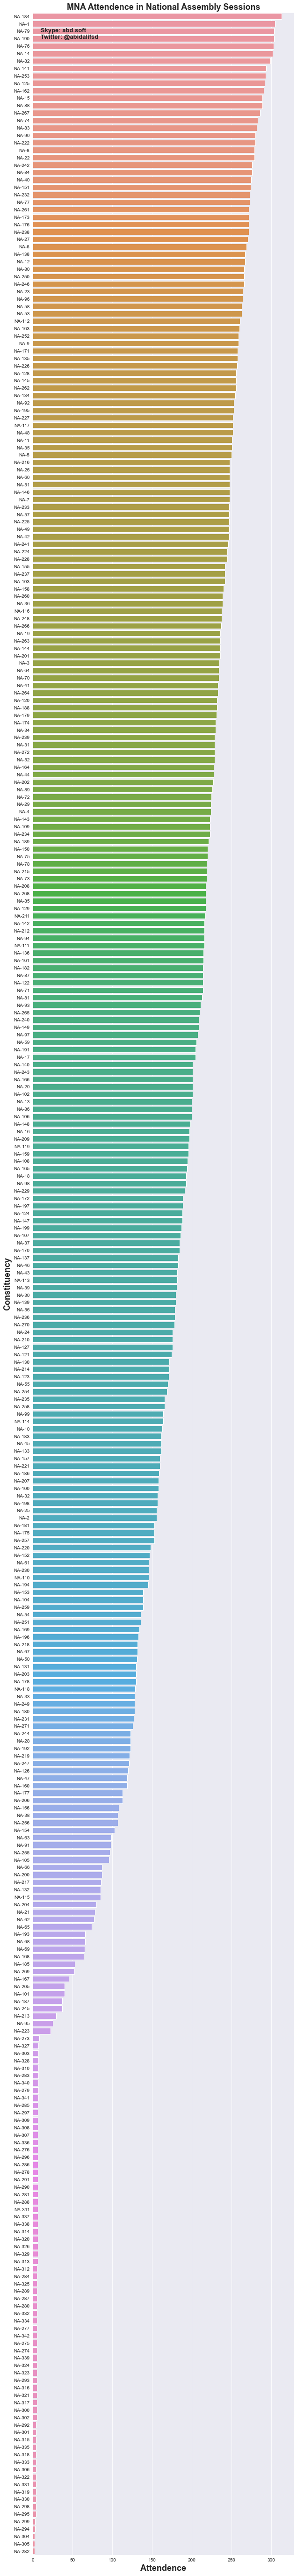

In [413]:
figure = plt.figure(figsize=(10, 100))
sns.barplot(x=presence, y=presence.index,)
plt.title('MNA Attendence in National Assembly Sessions', fontdict={'size': 18, 'weight': 'bold'})
plt.ylabel("Constituency", fontdict={'size': 18, 'weight': 'bold'})
plt.xlabel("Attendence", fontdict={'size': 18, 'weight': 'bold'})
plt.text(x=10, y=3, s='Skype: abd.soft\nTwitter: @abidalifsd', fontdict={'size': 13, 'weight': 'bold'})

## Conclusion
This concludes that strongest attendence in National Assembly Sessions is from MNA of NA-184

In [405]:
# To check the name of the MNA
df.loc[df['constituency'] == 'NA-184']


,meta,constituency,name,presense,session,joint_session,is_reserved,is_elected
160,157,NA-184,Nawabzada Iftakhar Ahmed Khan Babar,P,NaN,1.0,0,1
476,172,NA-184,Nawabzada lftekhar Ahmed Khan Babar,NaN,NaN,1.0,0,1
809,174,NA-184,Nawabzada lftekhar Ahmed Khan Babar,P,1.0,NaN,0,1
1143,173,NA-184,Nawabzada lftekhar Ahmed Khan Babar,P,1.0,NaN,0,1
1424,121,NA-184,Nawabzada Iftakhar Ahmed Khan Babar,P,NaN,2.0,0,1
...,...,...,...,...,...,...,...,...
75455,48,NA-184,Nawabzada Iftakhar Ahmed Khan Babar,P,43.0,NaN,0,1
75572,58,NA-184,Nawabzada Iftakhar Ahmed Khan Babar,P,43.0,NaN,0,1
75685,57,NA-184,Nawabzada Iftakhar Ahmed Khan Babar,P,43.0,NaN,0,1
76001,73,NA-184,Nawabzada Iftakhar Ahmed Khan Babar,P,43.0,NaN,0,1


This gives us the name of the MNA i.e. "Nawabzada Iftakhar Ahmed Khan Babar" who attended the most sessions of National Assembly between 2018 and 2022
